In [27]:

import numpy as np
import matplotlib.pyplot as plt

#                ->   [x1,    x2]
individuo = np.array([[2,  3],       
                      [3,  3],      
                      [6,  5],      
                      [7,  5],
                      [8,  6],
                              ])

# pesos    se pueden cambiar
w =np.array( [[3, 4, 9], # pesos para x1
              [6, 2, 8], # pesos para x2
                        ])
# Parámetro de aprendizaje
pa = 0.5

# Número de épocas
num_epocas = 5

# Tamaño de la matriz de pesos
num_neuronas = w.shape[1]  # 5 neuronas
longitud = num_neuronas - 1  # 4 (índice máximo)

for epoca in range(num_epocas):
    print(f"\n--- Época {epoca + 1} ---")
    
    for i in range(len(individuo)):
        print(f"\nProcesando individuo {i}: {individuo[i]}")
        
        # 1. Calcular distancias euclidianas entre el individuo y todas las neuronas
        distancias = []
        for j in range(num_neuronas):
            dx = w[0, j] - individuo[i, 0]
            dy = w[1, j] - individuo[i, 1]
            D = dx**2 + dy**2  # Distancia euclidiana al cuadrado
            distancias.append(D)
        
        print("Distancias calculadas:", distancias)
        
        # 2. Encontrar la neurona ganadora (menor distancia)
        indice_min = np.argmin(distancias)
        valor_min = distancias[indice_min]
        print(f"Neurona ganadora: índice {indice_min}, distancia {valor_min:.4f}")
        
        # 3. Actualizar pesos: neurona ganadora y sus vecinas
        if indice_min == 0:
            print("Caso: neurona ganadora es la primera (índice 0)")
            # Actualizar neurona ganadora (0) y su vecina derecha (1)
            for k in [0, 1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                
        elif indice_min == longitud:
            print(f"Caso: neurona ganadora es la última (índice {longitud})")
            # Actualizar neurona ganadora (longitud) y su vecina izquierda (longitud-1)
            for k in [longitud, longitud-1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                
        else:
            print(f"Caso: neurona ganadora es intermedia (índice {indice_min})")
            # Actualizar neurona ganadora y sus dos vecinas (izquierda y derecha)
            for k in [indice_min-1, indice_min, indice_min+1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
        
        print("Pesos actualizados:")
        print(w)

print("\n--- Pesos finales ---")
print(w)



--- Época 1 ---

Procesando individuo 0: [2 3]
Distancias calculadas: [10, 5, 74]
Neurona ganadora: índice 1, distancia 5.0000
Caso: neurona ganadora es intermedia (índice 1)
Pesos actualizados:
[[2 3 5]
 [4 2 5]]

Procesando individuo 1: [3 3]
Distancias calculadas: [2, 1, 8]
Neurona ganadora: índice 1, distancia 1.0000
Caso: neurona ganadora es intermedia (índice 1)
Pesos actualizados:
[[2 3 4]
 [3 2 4]]

Procesando individuo 2: [6 5]
Distancias calculadas: [20, 18, 5]
Neurona ganadora: índice 2, distancia 5.0000
Caso: neurona ganadora es la última (índice 2)
Pesos actualizados:
[[2 4 5]
 [3 3 4]]

Procesando individuo 3: [7 5]
Distancias calculadas: [29, 13, 5]
Neurona ganadora: índice 2, distancia 5.0000
Caso: neurona ganadora es la última (índice 2)
Pesos actualizados:
[[2 5 6]
 [3 4 4]]

Procesando individuo 4: [8 6]
Distancias calculadas: [45, 13, 8]
Neurona ganadora: índice 2, distancia 8.0000
Caso: neurona ganadora es la última (índice 2)
Pesos actualizados:
[[2 6 7]
 [3 5 5]

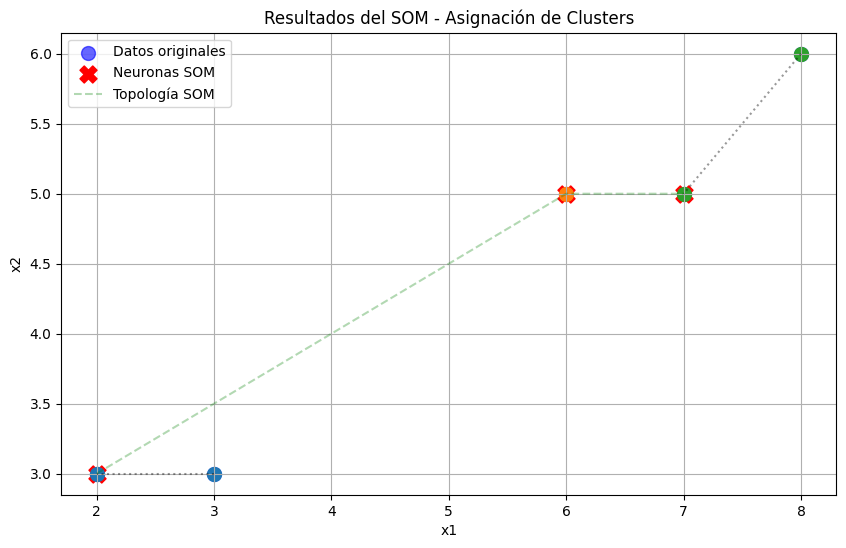

In [28]:
# Código adicional para visualización
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(individuo[:, 0], individuo[:, 1], c='blue', label='Datos originales', s=100, alpha=0.6)

# Graficar los pesos finales de las neuronas
plt.scatter(w[0, :], w[1, :], c='red', marker='X', label='Neuronas SOM', s=150)

# Conectar las neuronas para mostrar la topología
plt.plot(w[0, :], w[1, :], 'g--', alpha=0.3, label='Topología SOM')

# Asignar cada punto a su neurona ganadora y colorear
for i in range(len(individuo)):
    distancias = [np.linalg.norm(individuo[i] - w[:, j]) for j in range(num_neuronas)]
    neurona_ganadora = np.argmin(distancias)
    plt.plot([individuo[i, 0], w[0, neurona_ganadora]], 
             [individuo[i, 1], w[1, neurona_ganadora]], 
             'k:', alpha=0.4)
    
    # Colorear según la neurona ganadora
    plt.scatter(individuo[i, 0], individuo[i, 1], c=f'C{neurona_ganadora}', s=100)

plt.title('Resultados del SOM - Asignación de Clusters')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()